In [109]:
#Jericho Jacala and Alden George
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np

In [110]:
def logisticProcessing(X,y):


  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Normalize the feature data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Define and train the logistic regression model
  model = LogisticRegression()
  model.fit(X_train_scaled, y_train)

  # Predict on the testing set
  y_pred = model.predict(X_test_scaled)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy: {accuracy:.4f}")
  return accuracy

In [111]:
data = pd.read_csv('cleaned_game_stats_2010_2016.csv')
columns_to_drop = ['HomeTeam', 'AwayTeam', 'Total','H-RushAtt','H-Score','A-RushAtt','A-Score']
data = data.drop(columns=columns_to_drop, axis=1)

In [112]:
# Load the cleaned data
cleaned_data_path = 'cleaned_game_stats_2010_2016.csv'  # Replace with actual file path
combined_data = pd.read_csv(cleaned_data_path)

# Define your features and target
X = combined_data[['H-RushYards', 'H-PassYards']]  # Example features
y = combined_data['Result'].apply(lambda x: 1 if x == 1 else 0)  #(1: Home Win, 0: Otherwise)




In [113]:
#run logistic model
logisticProcessing(X,y)

Model Accuracy: 0.6295


0.6295264623955432

In [114]:
#in order to reduce the complexity of the data, we conduct principle component analysis to reduce the complexity of our data
def pcaprocessing(X,n):
  pca = PCA(n_components=n)
  std_scaler = StandardScaler()
  X_scaled = std_scaler.fit_transform(X)
  pca.fit(X_scaled)
  transformed = pca.transform(X_scaled)
  return transformed

Model Accuracy: 0.4568
Model Accuracy: 0.5682
Model Accuracy: 0.5766
Model Accuracy: 0.5794
Model Accuracy: 0.5850
Model Accuracy: 0.6657


Text(0, 0.5, 'Accuracy')

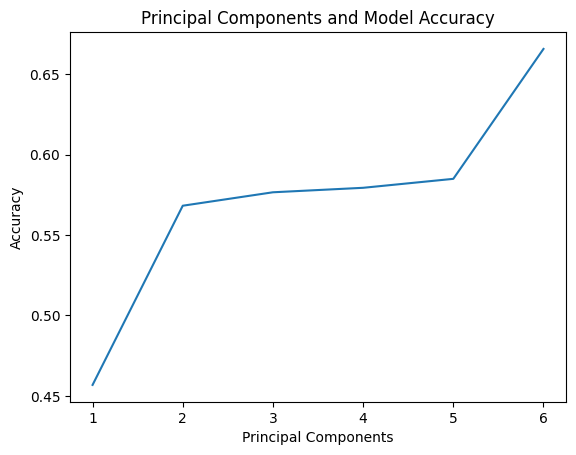

In [115]:
#We added all features as proposed and sought to determine how the number of principal components affected the accuracy of the data.
#The predictions were most accurate with no pca at all (or 6 principal components)
X = combined_data[['H-RushYards', 'H-PassYards','H-Turnover','A-RushYards', 'A-PassYards','A-Turnover']]
y = combined_data['Result']
components = []
for n in range(1,7):
  components.append(pcaprocessing(X,n))
accuracies = []
for i in components:
  accuracies.append(logisticProcessing(i,y))
plt.plot(range(1,7),accuracies)
plt.title('Principal Components and Model Accuracy')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy')

It appears that the model maintained optimal accuracy with no PCA at all, despite 6 features.

In [116]:
#https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
def SVMprocessing(X,y,k):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  clf = svm.SVC(kernel=k)
  clf.fit(X_train_scaled,y_train)
  y_pred = clf.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy: {accuracy:.4f}")
  return accuracy

In [117]:
#SVM modelling does slightly better with only preliminary features than logistic regression
X = combined_data[['H-RushYards', 'H-PassYards']]
y = combined_data['Result'].apply(lambda x: 1 if x == 1 else 0)
SVMprocessing(X,y,'linear')

Model Accuracy: 0.6351


0.6350974930362117

In [118]:
X = combined_data[['H-RushYards', 'H-PassYards','H-Turnover','A-RushYards', 'A-PassYards','A-Turnover']]
y = combined_data['Result']
SVMprocessing(X,y,'linear')

Model Accuracy: 0.6797


0.6796657381615598

Without tuning, it seems that SVM only yields slightly more accuracy. However, we could possibly tune using different kernels. Since it is difficult to visualize the data, it is difficult to hypothesize which kernel would be best:

Model Accuracy: 0.6797
Model Accuracy: 0.6797
Model Accuracy: 0.6797
Model Accuracy: 0.6797
Model Accuracy: 0.6797
Model Accuracy: 0.6797
Model Accuracy: 0.6797
Model Accuracy: 0.6797
Model Accuracy: 0.6797
Model Accuracy: 0.6797
Model Accuracy: 0.6657
Model Accuracy: 0.6657
Model Accuracy: 0.6657
Model Accuracy: 0.6657
Model Accuracy: 0.6657
Model Accuracy: 0.6657
Model Accuracy: 0.6657
Model Accuracy: 0.6657
Model Accuracy: 0.6657
Model Accuracy: 0.6657
Model Accuracy: 0.6825
Model Accuracy: 0.6825
Model Accuracy: 0.6825
Model Accuracy: 0.6825
Model Accuracy: 0.6825
Model Accuracy: 0.6825
Model Accuracy: 0.6825
Model Accuracy: 0.6825
Model Accuracy: 0.6825
Model Accuracy: 0.6825
Model Accuracy: 0.6295
Model Accuracy: 0.6295
Model Accuracy: 0.6295
Model Accuracy: 0.6295
Model Accuracy: 0.6295
Model Accuracy: 0.6295
Model Accuracy: 0.6295
Model Accuracy: 0.6295
Model Accuracy: 0.6295
Model Accuracy: 0.6295


Text(0, 0.5, 'Accuracy')

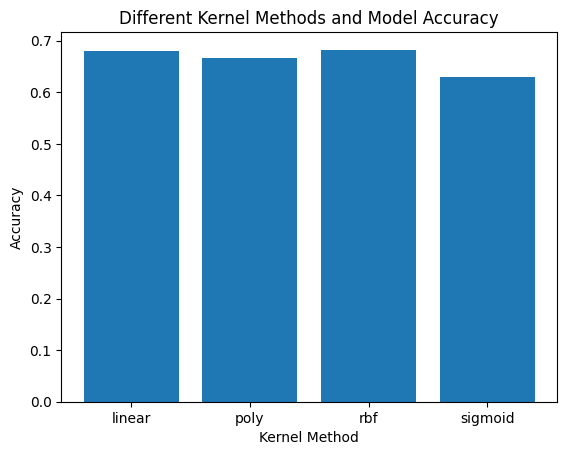

In [119]:
accuracies = []
for k in ['linear','poly','rbf','sigmoid']:
  trials = []
  for i in range(10):
    trials.append(SVMprocessing(X,y,k))
  accuracies.append(np.average(trials))
plt.bar(['linear','poly','rbf','sigmoid'],accuracies)
plt.title('Different Kernel Methods and Model Accuracy')
plt.xlabel('Kernel Method')
plt.ylabel('Accuracy')

In [120]:
def neuralProcessing(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  clf = MLPClassifier(random_state=1, max_iter=10000, solver='sgd')
  clf.fit(X_train_scaled, y_train)
  y_pred = clf.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy: {accuracy:.4f}")
  return accuracy

In [121]:
neuralProcessing(X,y,)

Model Accuracy: 0.6685


0.6685236768802229

Now that we've explored different methods of classifying the data, we open up to the complete dataset to see if we can acquire extra accuracy from more training data. We choose the SVM model with polynomial kernel since this appeared to yield the best results so far.

In [122]:
def get_outcome(home,away):
  if home > away:
    return 1
  elif away > home:
    return -1
  else:
    return 0

In [123]:
data_path = '/content/nfl_team_stats_2002-2023.csv'
df = pd.read_csv(data_path)
df['turnovers_home'] = df['interceptions_home'] + df['fumbles_home']
df['turnovers_away'] = df['interceptions_away']+ df['fumbles_away']
X = df[['pass_yards_home', 'rush_yards_home','turnovers_home','pass_yards_away','rush_yards_away','turnovers_away']]
df['outcome'] = df.apply(lambda row: get_outcome(row['score_home'], row['score_away']), axis=1)

y = df['outcome']

In [124]:
SVMprocessing(X,y,'poly')

Model Accuracy: 0.8272


0.8271500843170321

The model accuracy increased! Let's see if we can separate fumbles and interceptions to increase accuracy

Model Accuracy: 0.7167
Model Accuracy: 0.7352
Model Accuracy: 0.7403
Model Accuracy: 0.7470
Model Accuracy: 0.8204
Model Accuracy: 0.8263


Text(0, 0.5, 'Accuracy')

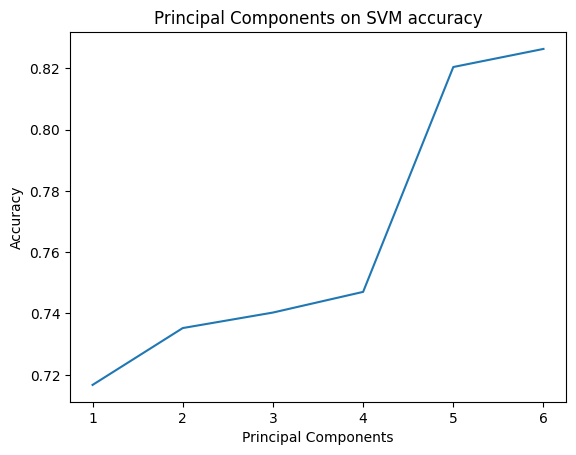

In [125]:
#X = df[['pass_yards_home', 'rush_yards_home','interceptions_home','fumbles_home','pass_yards_away','rush_yards_away','interceptions_away','fumbles_away']]  # Example features
components = []
for n in range(1,7):
  components.append(pcaprocessing(X,n))
accuracies = []
for i in components:
  accuracies.append(SVMprocessing(i,y,'poly'))
plt.plot(range(1,7),accuracies)
plt.title('Principal Components on SVM accuracy')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy')

PCA does not appear to improve model performance for SVM.

In [126]:
#essentially the same as svmprocessing, but we return the model instead
def makeModel(X,y,k):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  clf = svm.SVC(kernel=k)
  clf.fit(X_train_scaled,y_train)
  y_pred = clf.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy: {accuracy:.4f}")
  return clf, scaler

In [127]:
X = df[['pass_yards_home', 'rush_yards_home','turnovers_home','pass_yards_away','rush_yards_away','turnovers_away']]
y = df['outcome']
cols = ['pass_yards_home', 'rush_yards_home','turnovers_home','pass_yards_away','rush_yards_away','turnovers_away']  #change column names to allow for scaling later
clf,scaler = makeModel(X,y,'poly')

Model Accuracy: 0.8272


In [128]:
data_path = '/content/playoff_test_2023 - Sheet1.csv'
df = pd.read_csv(data_path)

X_test = df[['expected_pass_home', 'expected_rush_home','expected_turnovers_home','expected_pass_away','expected_rush_away','expected_turnovers_away']]
X_test.columns = cols
y_test = df['outcome']
X_test_scaled = scaler.transform(X_test)
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Recall: {recall:.4f}")
print(f"Model Precision: {precision:.4f}")

Model Accuracy: 0.6923
Model Recall: 1.0000
Model Precision: 0.6923
